## Lab 5 (February 07):
### Exploratory data Analysis (EDA)

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>

  Today, we are going to look at:   
 **Univariate Distributions**
 - [Discrete (Categorical) Variables]()
 - [Continuous Variables]()



 **Bivariate Distributions (Covariation)**
 - [Continuous - Discrete]()
 - [Continuous  - Continuous]()
 - [Discrete - Discrete]()

 






<br><br>
> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [2]:
install.packages("gapminder")                      ## Use the install.packages("<PACKAGE NAME>") command to install packages in R
library(gapminder)                                 ## To load a package (already installed) use the library(<PACKAGE NAME>) command
library(tidyverse)       
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



> ## Next, we load our dataset for this lab

In [ ]:
## gapminder Dataset
head(gapminder)
 

In [ ]:
## iris Dataset
head(iris) 

In [ ]:
## car Dataset
head(mpg)

---

<br> <br>


# 1. Univariate Distributions

## 1.1 Discrete (Categorical) Variables

We have already seen lots of ways to visualize the distribution of categorical variables, but it's work making a recall! For univariate categorical variables, our main interest lies in making visuals of the counts of data in each category. We do this with the help of `geom_bar` and `geom_col` for bar plots and with the help of `coord_polar` we obtain pie charts. Let's review an example:

## Example 1.1.1 

Use dplyr to obtain numeric summaries of counts (see challenge 4.3 from lab 04)

In [ ]:
## Use dplyr to obtain numeric summaries of counts (see challenge 4.3 from lab 04)
(df <- gapminder %>%
        filter(year == 2007) %>%
        group_by(continent) %>%
        summarise(mean_life_expt = mean(lifeExp),
                  counts = n()))

Now, make visuals of this summary using both bar plot and pie chart

In [ ]:
##  make visuals of this summary using both bar plot 
df %>% ggplot() +
         geom_col(mapping = aes(x = continent, y = mean_life_expt, fill = continent)) +
         theme_bw()  ## black and white theme

Now, make visuals of this summary using both bar plot and pie chars

In [ ]:
## make visuals using pie chart
df %>% ggplot(mapping = aes(x = 1, y = counts, fill = continent)) +
         geom_col(width = 1, color = "white") +
         coord_polar(theta = "y") +
         ## adding labels
         geom_label(mapping = aes(label = counts), ## alternatively use geom_text which has no border around the labels
                    color = "black",               ## border colr
                    position = position_stack(vjust = 0.5), 
                    show.legend = FALSE) +
         theme_void() +                            ## clears backgrond
         theme(legend.position = "right")         ## move legend to bottom

<br><br>
## 1.2 Continuous Variables
In the case of continuous variables, common visualizations for their distributions include:

- `geom_area()` - Area plots
- `geom_density()` - Kernel density plots
- `geom_histogram()` - Histogram plots
- `geom_freqpoly()` - Frequency polygon plots
- `geom_dotplot()` - Dot plots
- `geom_qq()` - Quantile-Quantile plots


*So you see, there are several ways of visualizing the distribution of continuous variables. We will briefly look as some examples and the sharpen our focus on Histograms, Densities and Frequency Polygon.*
<br><br>


## Example 1.2.1 Visualizing continuous variables

Let us visulaize the distribution of `gdpPerCap` for the geometries above

In [ ]:
## (1) Area plot

gapminder %>%
   ggplot(mapping = aes(x = gdpPercap)) +
   geom_area(stat = "bin", fill = "dodgerblue") +
   theme_bw()

In [ ]:
## (2) Dot plot

gapminder %>%
   ggplot(mapping = aes(x = gdpPercap)) +
   geom_dotplot(fill = "white", stroke = 6) +
   theme_bw()

> Before we look at Histograms, Densities and Frequency Polygons, let us review some key facts about the distribution of contininuous variables.

**Types of Histograms**
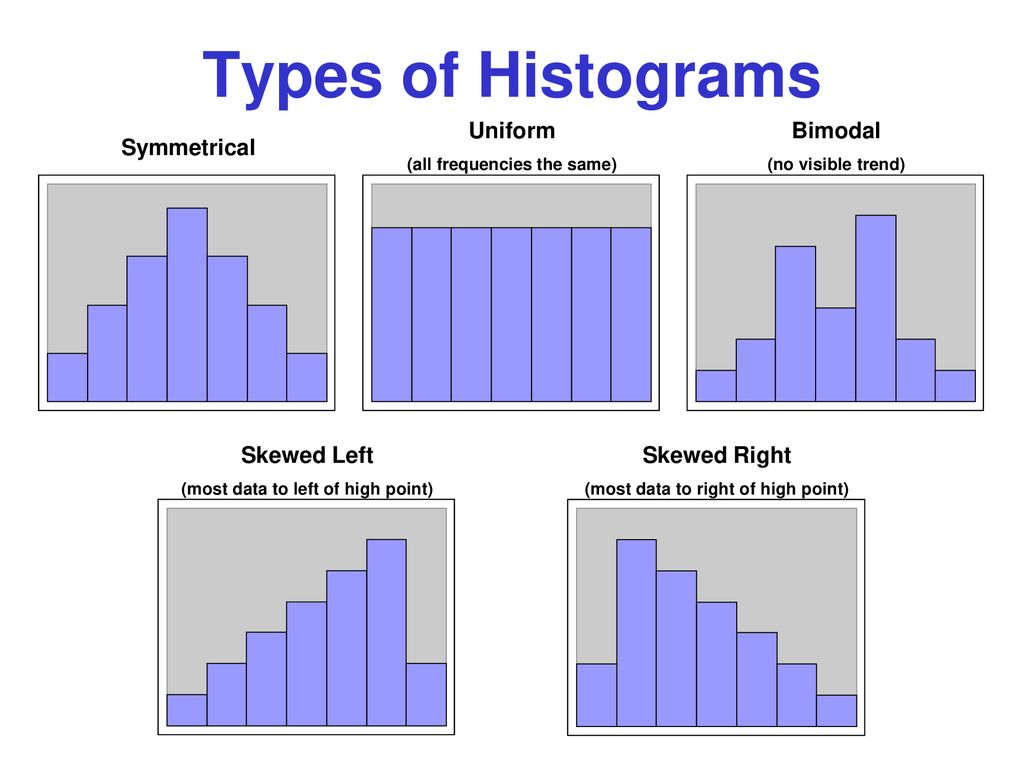

*source: https://slideplayer.com/slide/14871088/*

**Classifying Skewnwess**
- Symmetric (Bell Shaped) - `Mean = Median = Mode`
- Positively Skewed (Skewed to the right) - `Mean > Median > Mode` such data usually exist in income distribution
- Negatively Skewed (Skewed to the right) - `Mean < Median < Mode` 

**How do Histograms work?**
Histograms work by cutting the data into groups called bins. Counts are obtained for all those data that fall into each bin. Each bin then becomes it's own "bar" on the plot, whose height represent their counts.

In histograms, two popular computed variables are:
- `count` - number of points in bin
- `density` - density of points in bin, scaled to integrate to 1

<br><br>
## Example 1.2.2 Histograms, Densities and Frequency polygons

Use dplyr to obtain numeric summaries of counts for Histograms

In [ ]:
gapminder %>%
    count(cut_width(gdpPercap, 100)) ## cut intervals with uniform widths of 100

Now, make visualize using histograms

In [ ]:
## (1) Histogram with counts (default)
gapminder %>% 
   ggplot() + 
   geom_histogram(mapping = aes(x = gdpPercap))

In [ ]:
## (2) Histogram with stats densities
gapminder %>% 
   ggplot() + 
   geom_histogram(mapping = aes(x = gdpPercap, y = stat(density)))  ## or y = ..density..

In [ ]:
## (3) Density plot
gapminder %>% 
   ggplot(mapping = aes(x = gdpPercap)) + 
   geom_density() 

In [ ]:
## (4) Histogram with frequency polygon
gapminder %>% 
   ggplot(mapping = aes(x = gdpPercap)) + 
   geom_histogram() +
   geom_freqpoly(color = "darkorange", size = 2) + 
   theme_bw()

<br><br>  
# 2. Bivariate Distributions (Covariation)

## 2.1 Continuous - Discrete (categorical) Variables
One could think of two major ways to visualize continuous-discrete variables viz:

- Mapping the discrete variable to the `color` and/or `fill` aesthetic for `geom_frequency`, `geom_histograms` or `geom_density`
- Using more preferred alternatives boxplots (`geom_boxplot`) or Violin plots (`geom_violin`).


<br><br>
## Example 2.1.1 Using Histograms, Frequency Polygons and Frequency Densities.

Make a bivariate plot for GDP per Capita for each continent

In [ ]:
## (1) Frequency Polygon
gapminder %>% 
   ggplot() +
   geom_freqpoly(mapping = aes(x = gdpPercap, color = continent)) + 
   theme_bw()

In [ ]:
## (2) Histogram 
gapminder %>% 
   ggplot() +
   geom_histogram(mapping = aes(x = gdpPercap, color = continent, fill = continent)) + 
   theme_bw()

In [ ]:
## (3) Density plot 
gapminder %>% 
   ggplot() +
   geom_density(mapping = aes(x = gdpPercap, color = continent)) + 
   theme_bw()

In [ ]:
## (3) Density plot with fills
gapminder %>% 
   ggplot() +
   geom_density(mapping = aes(x = gdpPercap, color = continent, fill = continent), alpha = 0.2) + 
   theme_bw()


<br><br>
## Example 2.1.2 Using Box and Violin plots


- The **boxplot** compactly displays the distribution of a continuous variable. It visualises five summary statistics (the median, two hinges and two whiskers), and all "outlying" points individually.

- A **violin plot** is a compact display of a continuous distribution. It is a blend of `geom_boxplot()` and `geom_density()`: a violin plot is a mirrored density plot displayed in the same way as a boxplot.

_source: https://ggplot2.tidyverse.org/reference_

**Interpreting Boxplots**
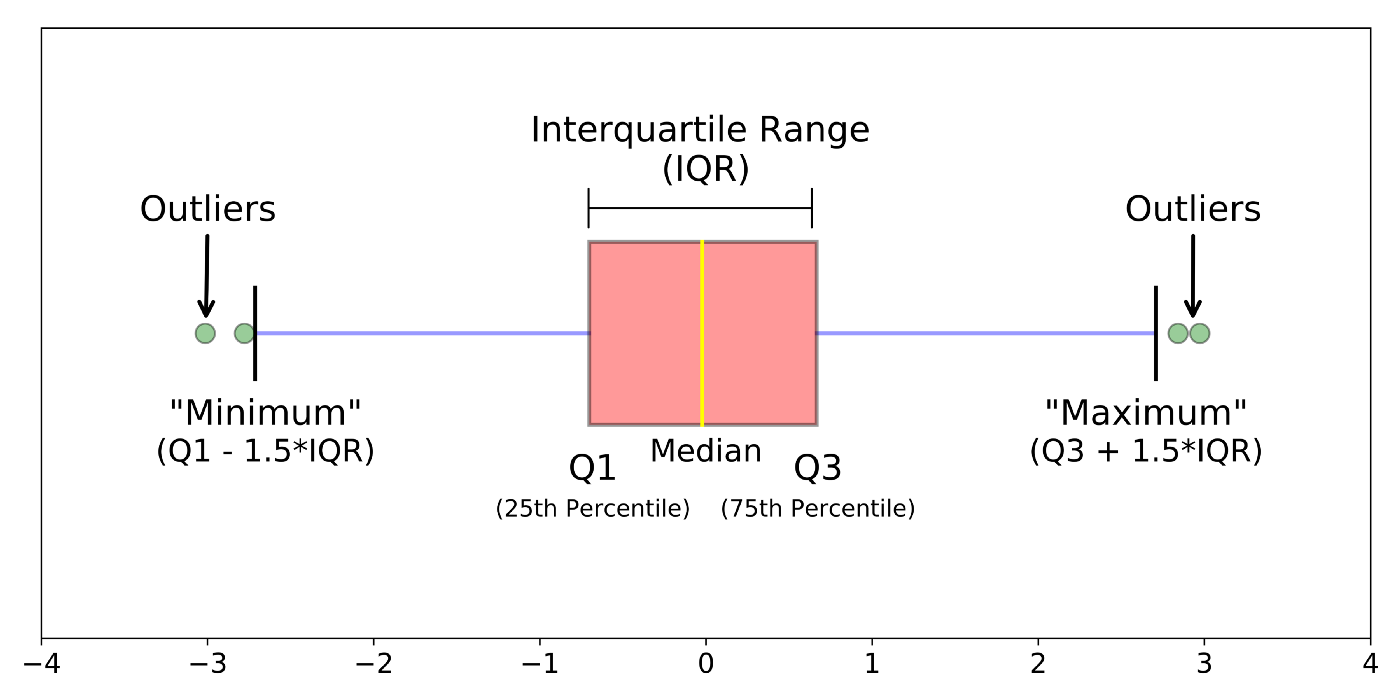

*source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51*

In [ ]:
## Boxplot for GDP Per Capita for each continent
gapminder %>%
  ggplot(mapping = aes(x = continent, y = gdpPercap)) +
  geom_boxplot()

It is easier to visualize the distribution when the cordinates are flipped. Let's do that below:

In [ ]:
## Boxplot for GDP Per Capita for each continent with flipped coordinates
gapminder %>%
  ggplot(mapping = aes(x = continent, y = gdpPercap)) +
  geom_boxplot() +
  coord_flip() +
  theme_bw()

In [ ]:
## Adding notches
gapminder %>%
  ggplot(mapping = aes(x = continent, y = gdpPercap)) +
  geom_boxplot(notch = TRUE) +
  coord_flip() +
  theme_bw()

In [ ]:
## Differentiate Outliers
gapminder %>%
  ggplot(mapping = aes(x = continent, y = gdpPercap)) +
  geom_boxplot(notch = TRUE, outlier.colour = "red", outlier.shape = 1) +
  coord_flip() +
  theme_bw()

In [ ]:
## Superimpose points on top of Boxplots using geom_jitter
gapminder %>%
  ggplot(mapping = aes(x = continent, y = gdpPercap)) +
  geom_boxplot(notch = TRUE, outlier.colour = "red", outlier.shape = 1) + ## outliers can be removed by setting outlier.shape = NA
  geom_jitter(width = .2) +
  coord_flip() +
  theme_bw()

In [ ]:
## Now lets differentiate our plots with color aesthetic
gapminder %>%
  ggplot(mapping = aes(x = continent, y = gdpPercap, color = continent)) +
  geom_boxplot(notch = TRUE, outlier.colour = "red", outlier.shape = 1,  outlier.alpha = 0.1) + ## Outliers could also be faded
  coord_flip() +
  theme_bw()

We could do similar plots for Violin plots

In [ ]:
## Boxplot for GDP Per Capita for each continent with flipped coordinates
gapminder %>% #filter(year == 2007) %>%
  ggplot(mapping = aes(x = continent, y = gdpPercap, fill = continent)) +
  geom_violin() +
  theme_bw()

<br><br>
## 2.2 Continuous - Continuous Variables
Popular plots for continuous- continuous variables include:
- `geom_point()` - for Scatter plots
- `geom_bin2d()` - also known as **heatmap of 2d bin counts**, is usually a good alternative for `geom_point` when there is overplotting. It divides the plane into rectangles, counts the number of cases in each rectangle, and then (by default) maps the number of cases to the rectangle's fill. A variant is `geom_hex`.
- `geom_density_2D` - as the name implies, it is the 2D version of `geom_density`. It is also know as a 2d contour plot

*We will look at a few examples below*

## Example 2.2.1
Make bivariate plots for GDP per capita and life expectancy

In [ ]:
## (1) Scatter plot
gapminder %>% filter(gdpPercap < 15000) %>%
  ggplot() +
  geom_point(mapping = aes(x = gdpPercap, y = lifeExp)) +
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()

In [ ]:
## (2) Heatmap of 2d bin counts
gapminder %>% #filter(gdpPercap < 15000) %>%
  ggplot() +
  geom_bin_2d(mapping = aes(x = gdpPercap, y = lifeExp)) +
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()

In [ ]:
 ## (3) Contour Plot

 gapminder %>% filter(gdpPercap < 15000) %>%
  ggplot(mapping = aes(x = gdpPercap, y = lifeExp), color = "dodgerblue") +
  geom_point(color = "red", alpha = 0.3) +
  geom_density_2d() +
  labs(x     = "GDP per capita",
       y     = "Life Expectancy",
       title = "Countries' Life expectancy against GDP per capita") + 
  theme_bw()


<br><br>
## 2.3 Discrete - Discrete Variables
Sometimes, we are interested in summarizing two (2) categorical variables. A common example is a **2 × 2** contingency table. Let us look at an example using `dplyr`.

Create a contingency table for `continent` and `country` using the `mpg` dataset

In [ ]:
## contingency table for continent and country using the mpg dataset
mpg%>%
  group_by(class, cyl)%>%
  summarise(n=n())%>%
  spread(cyl, n)

We can visualize such data using:
- `geom_count` - a variant `geom_point()` that counts the number of observations at each location, then maps the count to point area
- `geom_tile`

<br>

## Example 2.3.1

In [ ]:
# (1) Geom Count
mpg %>% ggplot() +
    geom_count(mapping = aes(x = class, y = cyl)) +
    theme_bw()

In [ ]:
# (2) Geom Tile
mpg %>%
    count(class, cyl) %>%
    ggplot() +
        geom_tile(mapping = aes(x = class, y = cyl, fill = n)) +
        theme_bw()

<br><br>
# 3. Challenge
Complete the following tasks: 

## 4.1 Gapminder Dataset
- Subset the gapminder data for only the year 2007
- make a histogram for GDP per capita
- Superimpose your plot with a density plot. _[Hint: To make this work, go back to step two change the y axis of the histogram to `density`]_


**Question:** what type of distribution best explains the data based on what was discussed in **section 1.2**?

In [ ]:
## your code here

## 4.2 Gapminder Dataset
The goal of this task is to use visualization to inspect the distribution of a contunuous variable in the gapminder dataset. While this may look challenging, you are encouraged to follow the instructions to help complete the task.

- make a histogram for GDP per capita
- Superimpose your plot with a density plot   

We know that a distribution is positively skewed (skewed to the right) when the mean is greater than the median. We wish to visualize the mean and median as lineplots superimposed on our previous plot:

- create a new tibble containing the mean and median from tyhe gapminder data
- superimpose vertical-dashed line plots (see `geom_vline`) for both the mean and median onto the previous plot; differentiating these two lines by your choice of color:
  + you can create a color tibble and map the vertical line plots to each color.
  + with the help of `scale_color_manual`, you can then obtain a legend matching those colors


**Question:** Based on the resulting plot, what type of distribution best explains the data based on what was discussed in **section 1.2**?

In [161]:
## your code here